In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [23]:
#net = pd.read_excel(r"C:\Users\Client\OneDrive - Queen Mary, University of London\PhD\PhD back up\Programing full\R\Datasets\A Proteomic Network\A prot ALS stats no scale.xlsx", header=0)
#net.head()

netl = pd.read_excel (r"C:\Users\ybobe\OneDrive - Queen Mary, University of London\PhD\PhD back up\Programing full\R\Datasets\A Proteomic Network\A prot ALS stats no scale.xlsx", header = 0)
netl.head()

,Gene names,Control 1,Control 2,Control 3,Control 4,Control 5,Control 6,Control 7,Control 8,ALS 1,...,Log2 fold ALS-FTD,Log2 fold ALS-ALS-FTD,Log2 fold FTD-C,Log2 fold ALS-FTD-FTD,TTEST ALS-C,TTEST ALS-FTD,TTEST ALS-ALS-FTD,TTEST FTD-C,TTEST ALS-FTD-FTD,TTEST ALS-FTD-C
0,TUBA1A,35.340465,35.360227,35.316990,35.629164,35.306858,35.208816,35.252199,35.352975,35.328403,...,0.000339,0.000476,-0.001262,-0.000137,0.651588,0.827459,0.768978,0.581110,0.943017,0.548553
1,HBB,34.805838,34.799389,34.960708,35.679915,35.640050,34.863775,34.106963,34.183703,35.292579,...,-0.002327,-0.004963,0.023835,0.002636,0.038068,0.647732,0.176999,0.028270,0.602122,0.015456
2,TUBB4B,35.237408,35.229361,35.225127,35.423859,35.175022,35.164483,35.218322,35.250528,35.240021,...,0.000054,-0.000086,-0.001554,0.000139,0.301363,0.967188,0.952713,0.330464,0.930178,0.406024
3,ACTG1,35.080176,35.035111,35.046158,35.221391,34.970036,35.054252,35.040957,35.133440,35.075034,...,-0.001980,-0.001499,0.000718,-0.000480,0.328630,0.128446,0.107975,0.648366,0.714778,0.857389
4,HBA2,34.441864,34.415415,34.430065,35.063952,35.273882,34.427993,33.929326,33.854507,34.813764,...,-0.003761,-0.003566,0.023189,-0.000195,0.031449,0.404822,0.284397,0.015928,0.965593,0.014901


In [24]:
nett= netl.T
nett.head()

,0,1,2,3,4,5,6,7,8,9,...,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611
Gene names,TUBA1A,HBB,TUBB4B,ACTG1,HBA2,GFAP,DPYSL2,MBP,GAPDH,SPTAN1,...,LSM14A,FRMD4A,SCN1A,TP53BP1,TRIB2,MEAF6,ACBD5,SLC4A8,PPIG,DYRK1A
Control 1,35.340465,34.805838,35.237408,35.080176,34.441864,32.742219,34.489247,32.859648,34.205326,34.43887,...,19.848858,19.770962,18.562119,18.977539,19.375295,18.180863,18.497584,19.214524,18.211645,19.098626
Control 2,35.360227,34.799389,35.229361,35.035111,34.415415,32.872073,34.471095,32.707999,34.132392,34.331253,...,19.465559,20.019011,19.252946,19.521933,19.539208,18.275198,18.438914,18.096978,18.170713,18.865406
Control 3,35.31699,34.960708,35.225127,35.046158,34.430065,33.123628,34.574437,33.881963,34.24442,34.300724,...,19.520805,20.103307,19.726306,19.431328,19.469287,18.50801,18.571335,18.349789,18.864304,18.761203
Control 4,35.629164,35.679915,35.423859,35.221391,35.063952,33.49605,34.818268,35.101786,34.520625,34.260723,...,19.954144,19.424544,19.571888,19.681793,19.555624,18.271233,19.68187,18.591834,19.514376,18.573327


In [28]:
netf= netl.filter(["Gene names", "Mean control", "Mean ALS", "Mean FTD", "Mean ALS-FTD"], axis=1)
netf.head()

,Gene names,Mean control,Mean ALS,Mean FTD,Mean ALS-FTD
0,TUBA1A,35.345962,35.323345,35.315047,35.311686
1,HBB,34.880043,35.403940,35.461084,35.525933
2,TUBB4B,35.240514,35.203881,35.202568,35.205972
3,ACTG1,35.072690,35.042045,35.090161,35.078481
4,HBA2,34.479626,34.947076,35.038297,35.033572


In [32]:
netf = netf.set_index(["Gene names"])

In [33]:
netf.head()

,Mean control,Mean ALS,Mean FTD,Mean ALS-FTD
Gene names,,,,
TUBA1A,35.345962,35.323345,35.315047,35.311686
HBB,34.880043,35.403940,35.461084,35.525933
TUBB4B,35.240514,35.203881,35.202568,35.205972
ACTG1,35.072690,35.042045,35.090161,35.078481
HBA2,34.479626,34.947076,35.038297,35.033572


In [34]:
scale_netf = preprocessing.scale(netf)

In [35]:
pca = PCA()

In [36]:
pca.fit(scale_netf)

PCA()

In [37]:
pca_data = pca.transform(scale_netf)

In [38]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)

In [ ]:
labels - ['PC']

<BarContainer object of 4 artists>

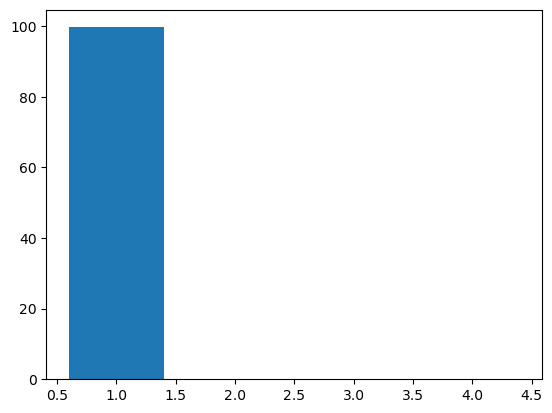

In [39]:
plt.bar(x=range(1,len(per_var)+1), height=per_var)


In [ ]:
pca_df = pd.Dataframe(pca_data, index = ["Mean control", "Mean ALS", "Mean FTD", "Mean ALS-FTD"])

In [10]:
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2612 entries, 0 to 2611
Data columns (total 64 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gene names             2609 non-null   object 
 1   Control 1              2612 non-null   float64
 2   Control 2              2612 non-null   float64
 3   Control 3              2612 non-null   float64
 4   Control 4              2612 non-null   float64
 5   Control 5              2612 non-null   float64
 6   Control 6              2612 non-null   float64
 7   Control 7              2612 non-null   float64
 8   Control 8              2612 non-null   float64
 9   ALS 1                  2612 non-null   float64
 10  ALS 2                  2612 non-null   float64
 11  ALS 3                  2612 non-null   float64
 12  ALS 4                  2612 non-null   float64
 13  ALS 5                  2612 non-null   float64
 14  ALS 6                  2612 non-null   float64
 15  ALS 

In [7]:
x = net['Log2 fold ALS-C']
y = net['TTEST ALS-C']
x1 = net['Log2 fold ALS-FTD']
y1 = net['TTEST ALS-FTD']
x2 = net['Log2 fold ALS-ALS-FTD']
y2 = net['TTEST ALS-ALS-FTD']
x3 = net['Log2 fold ALS-FTD-C']
y3 = net['TTEST ALS-FTD-C']

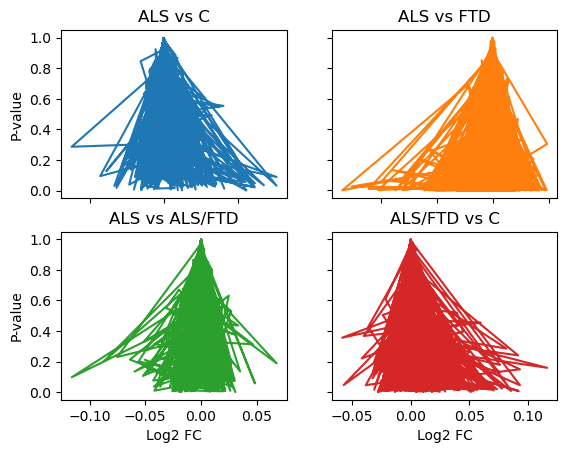

In [16]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('ALS vs C')
axs[0, 1].plot(x1, y1, 'tab:orange')
axs[0, 1].set_title('ALS vs FTD')
axs[1, 0].plot(x2, y2, 'tab:green')
axs[1, 0].set_title('ALS vs ALS/FTD')
axs[1, 1].plot(x3, y3, 'tab:red')
axs[1, 1].set_title('ALS/FTD vs C')

for ax in axs.flat:
    ax.set(xlabel='Log2 FC', ylabel='P-value')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


<ipython-input-22-313731e42684>:25: UserWarning: Legend does not support <AxesSubplot:label='1', xlabel='x Log2 FC', ylabel='P-value'> instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.figlegend((ax, ax2, ax2), ('ALS', 'ALS/FTD', 'FTD'), loc='upper left')
<ipython-input-22-313731e42684>:25: UserWarning: Legend does not support <AxesSubplot:label='2'> instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.figlegend((ax, ax2, ax2), ('ALS', 'ALS/FTD', 'FTD'), loc='upper left')


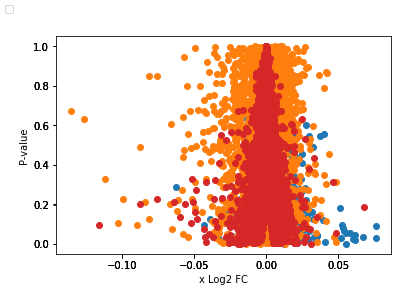

In [22]:
fig=plt.figure()
ax=fig.add_subplot( label="1")
ax2=fig.add_subplot( label="2", frame_on=False, sharex=ax)
ax3=fig.add_subplot( label="3", frame_on=False, sharex=ax)

ax.scatter(x, y, color="C0")
ax.set_xlabel("x Log2 FC")
ax.set_ylabel("P-value")
#ax.tick_params(axis='x', colors="C0")
#ax.tick_params(axis='y', colors="C0")

ax2.scatter(x1, y2, color="C1")
#ax2.tick_params(axis='x', colors="C1")
#ax2.tick_params(axis='y', colors="C1")

ax3.scatter(x2, y2, color="C3")
#ax3.set_xticks([])
#ax3.set_yticks([])

#handles, labels = ax.get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper center')

#plt.gca().get_legend_handles_labels()
#plt.figlegend(ax, labels, loc = 'lower center', ncol=5, labelspacing=0.)
plt.figlegend((ax, ax2, ax2), ('ALS', 'ALS/FTD', 'FTD'), loc='upper left')

plt.show()